# Load data

In [6]:
# Import necessary libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Load the dataset from Hugging Face 
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Clean up the 'job_posted_date' column by converting it to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [ ]:
# Explode the 'job_skills' column to create one row per skill
df = df[df['job_title_short'] == 'Data Analyst']
df_exploded = df.explode('job_skills')

# Group by 'job_skills' and calculate the count of job postings and median salary
skill_summary = df_exploded.groupby('job_skills').agg(
    Job_Postings=('job_skills', 'count'),
    Median_Salary=('salary_year_avg', 'median')
).sort_values(
    by='Job_Postings', ascending=False
).head(10)
skill_summary



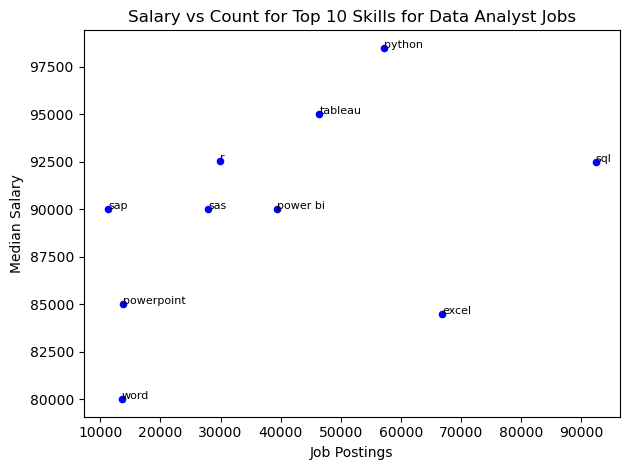

In [ ]:
# plot scatter plot
skill_summary.plot(
    kind='scatter',
    x='Job_Postings',
    y='Median_Salary',
    color='blue')

plt.title('Salary vs Count for Top 10 Skills for Data Analyst Jobs')
plt.xlabel('Job Postings')
plt.ylabel('Median Salary')
for i, txt in enumerate(skill_summary.index):
    plt.text(skill_summary['Job_Postings'].iloc[i],
             skill_summary['Median_Salary'].iloc[i],
             txt, fontsize=8)
plt.tight_layout()
plt.show()

